In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip

--2022-08-23 13:49:06--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-snake-breed-detection/identify-the-snake-breed-5-66d9a9f5/8a95c26e1bab11eb.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.132.80
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.132.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100929731 (96M) [application/zip]
Saving to: ‘8a95c26e1bab11eb.zip’

8a95c26e1bab11eb.zi 100%[===================>]  96.25M  13.5MB/s    in 8.4s    

2022-08-23 13:49:15 (11.5 MB/s) - ‘8a95c26e1bab11eb.zip’ saved [100929731/100929731]



In [ ]:
!unzip *.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/b70a166bfe.jpg  
  inflating: dataset/train/d31875b68e.jpg  
  inflating: dataset/train/22c66793fb.jpg  
  inflating: dataset/train/a468b1390f.jpg  
  inflating: dataset/train/9e43d2cedc.jpg  
  inflating: dataset/train/2e0299e991.jpg  
  inflating: dataset/train/e0b85d8ff1.jpg  
  inflating: dataset/train/6a651ec04a.jpg  
  inflating: dataset/train/46c87716a5.jpg  
  inflating: dataset/train/8c40d4f073.jpg  
  inflating: dataset/train/96e4fb744c.jpg  
  inflating: dataset/train/794a698960.jpg  
  inflating: dataset/train/dad1934f35.jpg  
  inflating: dataset/train/a1c66a2b3c.jpg  
  inflating: dataset/train/b62484a8e4.jpg  
  inflating: dataset/train/09462814f1.jpg  
  inflating: dataset/train/97dbdb4dd0.jpg  
  inflating: dataset/train/3bd7f56164.jpg  
  inflating: dataset/train/a2576a2fa1.jpg  
  inflating: dataset/train/f462f66aa6.jpg  
  inflating: dataset/train/740e1a7fca.jpg  
  inflating: dataset/trai

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import InputLayer, Dense, Dropout
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv("/content/dataset/train.csv")
train_df.head()

,image_id,breed
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [ ]:
train_df.columns=['filename', 'class']
train_df.head()

,filename,class
0,a8b3ad1dde,nerodia-erythrogaster
1,8b492b973d,pantherophis-vulpinus
2,929b99ea92,thamnophis-sirtalis
3,bbac7385e2,pantherophis-obsoletus
4,ef776b1488,agkistrodon-contortrix


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train = train_df.sample(frac = 0.9)
val = train_df.drop(train.index)

In [ ]:
train.shape

(4957, 2)

In [ ]:
val.shape

(551, 2)

In [ ]:
train['filename'] = '/content/dataset/train/' + train['filename']
train.head()

,filename,class
1989,/content/dataset/train/cf8c29ca4c,pantherophis-alleghaniensis
4341,/content/dataset/train/163a15a5cf,thamnophis-radix
4554,/content/dataset/train/173c8244e8,agkistrodon-piscivorus
4150,/content/dataset/train/4ce5827227,thamnophis-sirtalis
275,/content/dataset/train/30e7879cf9,thamnophis-sirtalis


In [ ]:
val['filename'] = '/content/dataset/train/' + val['filename']
val.head()

,filename,class
3,/content/dataset/train/bbac7385e2,pantherophis-obsoletus
6,/content/dataset/train/190317f717,crotalus-atrox
29,/content/dataset/train/054ac263b9,heterodon-platirhinos
38,/content/dataset/train/2613988a93,coluber-constrictor
41,/content/dataset/train/23b04b1237,crotalus-ruber


In [ ]:
unique_features = train['class'].unique()
len(unique_features)

35

In [ ]:
def append_ext(fn):
  return fn+".jpg"

train["filename"]=train["filename"].apply(append_ext)
train.head()

,filename,class
1989,/content/dataset/train/cf8c29ca4c.jpg,pantherophis-alleghaniensis
4341,/content/dataset/train/163a15a5cf.jpg,thamnophis-radix
4554,/content/dataset/train/173c8244e8.jpg,agkistrodon-piscivorus
4150,/content/dataset/train/4ce5827227.jpg,thamnophis-sirtalis
275,/content/dataset/train/30e7879cf9.jpg,thamnophis-sirtalis


In [ ]:
def append_ext(fn):
  return fn+".jpg"

val["filename"]=val["filename"].apply(append_ext)
val.head()

,filename,class
3,/content/dataset/train/bbac7385e2.jpg,pantherophis-obsoletus
6,/content/dataset/train/190317f717.jpg,crotalus-atrox
29,/content/dataset/train/054ac263b9.jpg,heterodon-platirhinos
38,/content/dataset/train/2613988a93.jpg,coluber-constrictor
41,/content/dataset/train/23b04b1237.jpg,crotalus-ruber


In [ ]:
sample_df = train.sample(16)
files = sample_df['filename'].tolist()
targets = sample_df['class'].tolist()

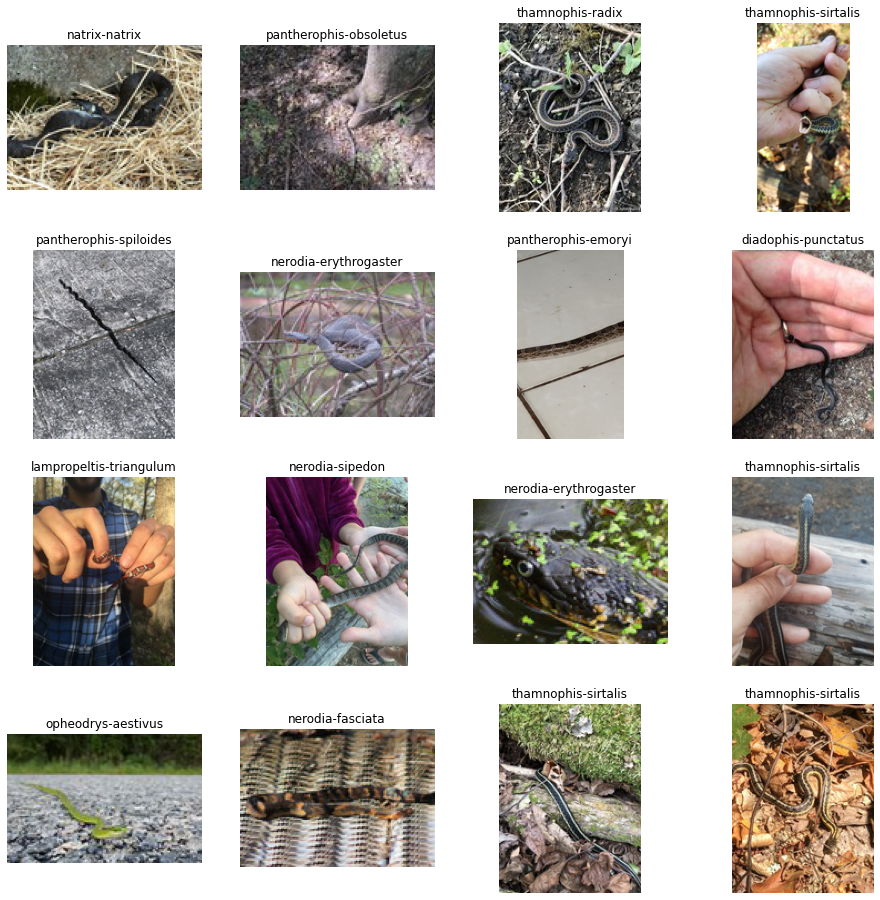

In [ ]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(nrows * 4,nrows * 4)

for i, (img_path, targets) in enumerate(zip(files,targets)):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(targets)

plt.show()

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train,
    directory = '/content/dataset/train',
    shuffle = True,
    target_size=(256, 256),
    class_mode= 'categorical'
)

Found 4957 validated image filenames belonging to 35 classes.


In [ ]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

val_generator = val_datagen.flow_from_dataframe(
    dataframe = val,
    directory = '/content/dataset/train',
    target_size = (256, 256),
    shuffle = True,
    class_mode = 'categorical'
)

Found 551 validated image filenames belonging to 35 classes.


In [ ]:
tf.keras.backend.clear_session()


In [ ]:
model = tf.keras.Sequential()
#Add Input Layer
model.add(InputLayer(input_shape=(256, 256, 3))) 

#Conv and Max2D layer
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', strides=(1,1), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters = 16, kernel_size=(3,3), padding='valid', strides=(1,1), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

#Hidden Layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

#Output Layer
model.add(Dense(len(unique_features), activation='softmax'))
#Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 61504)             0         
                                                                 
 dense_6 (Dense)             (None, 512)              

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
      if(logs.get('accuracy')>0.70):
        self.model.stop_training = True

callback = CustomCallback()

In [ ]:
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data=val_generator,
    callbacks=[callback]
)

Epoch 1/10
155/155 [==============================] - 539s 3s/step - loss: 3.4799 - accuracy: 0.0837 - val_loss: 3.3994 - val_accuracy: 0.0817
Epoch 2/10
155/155 [==============================] - 551s 4s/step - loss: 3.3918 - accuracy: 0.0902 - val_loss: 3.3749 - val_accuracy: 0.0817
Epoch 3/10
155/155 [==============================] - 422s 3s/step - loss: 3.3641 - accuracy: 0.0930 - val_loss: 3.3591 - val_accuracy: 0.1053
Epoch 4/10
155/155 [==============================] - 414s 3s/step - loss: 3.3550 - accuracy: 0.1043 - val_loss: 3.3384 - val_accuracy: 0.1034
Epoch 5/10
155/155 [==============================] - 412s 3s/step - loss: 3.3420 - accuracy: 0.1059 - val_loss: 3.3287 - val_accuracy: 0.0998
Epoch 6/10
155/155 [==============================] - 405s 3s/step - loss: 3.3305 - accuracy: 0.1085 - val_loss: 3.3211 - val_accuracy: 0.1180
Epoch 7/10
155/155 [==============================] - 406s 3s/step - loss: 3.3100 - accuracy: 0.1103 - val_loss: 3.3049 - val_accuracy: 0.1198

In [42]:
model.evaluate(val_generator)

18/18 [==============================] - 13s 729ms/step - loss: 3.2908 - accuracy: 0.1198


[3.290839672088623, 0.1197822168469429]

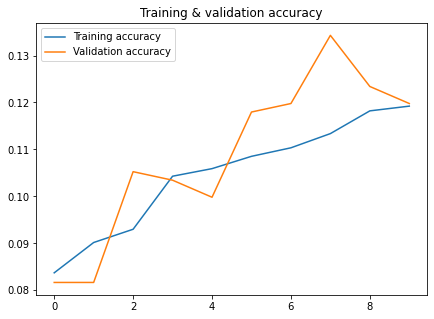

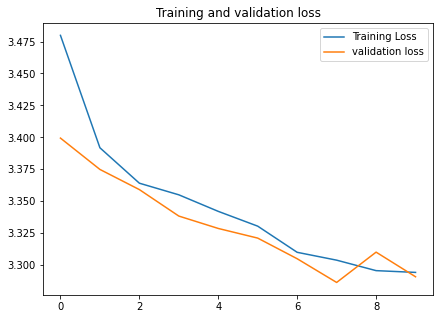

In [46]:
plt.figure(figsize=(7,5))

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
prob = model.predict(val_generator)
pred = np.argmax(prob, axis = 1)

In [48]:
print(confusion_matrix(val_generator.classes, pred))

[[ 0  0  0 ...  0  0 13]
 [ 0  0  0 ...  0  0 16]
 [ 0  0  0 ...  0  0  9]
 ...
 [ 0  0  0 ...  0  0  7]
 [ 0  0  0 ...  0  0  8]
 [ 0  0  0 ...  0  0 30]]


In [49]:
print("F-1 Score=", np.round(f1_score(val_generator.classes, pred, average='weighted'), 3))

F-1 Score= 0.031


(256, 256, 3)
(1, 256, 256, 3)
(1, 254, 254, 32)
(1, 127, 127, 32)
(1, 125, 125, 16)
(1, 62, 62, 16)


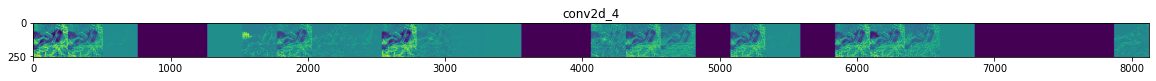

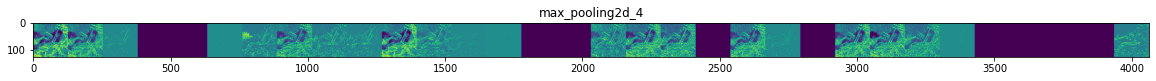

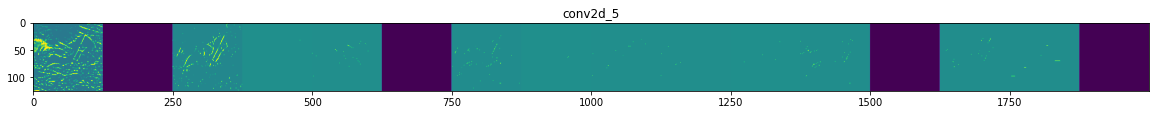

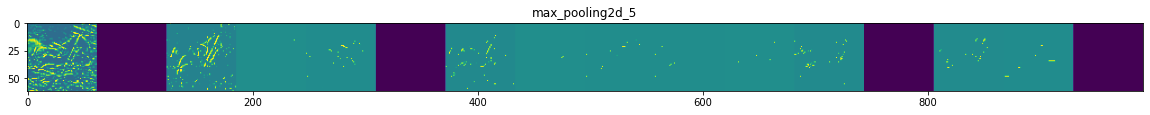

In [50]:
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = tf.keras.preprocessing.image.load_img(files[0], target_size=(256, 256) )
x=tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x=x.reshape ((1, ) + x.shape)
print (x.shape)
x/=255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len (feature_map.shape) == 4:
    n_features = feature_map.shape[-1]
    print(feature_map.shape)
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x= feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype ('uint8')
      display_grid[:, i*size : (i + 1) * size] = x
    scale =20. /n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [51]:
labels = dict((v,k) for k,v in train_generator.class_indices.items())

In [52]:
pred_labels = []
actuals = []
pred = np.argmax(model.predict(val_generator), axis=1)
for i in range(551):
  pred_labels.append(labels[pred[i]])
  actuals.append(labels[val_generator.classes[i]])

In [55]:
test_df = pd.DataFrame(columns=['file', 'pred_labels', 'actuals'])
test_df['file'] = val_generator.filenames
test_df['pred_labels'] = pred_labels
test_df['actuals'] = actuals
test_df.head()

,file,pred_labels,actuals
0,/content/dataset/train/bbac7385e2.jpg,thamnophis-sirtalis,pantherophis-obsoletus
1,/content/dataset/train/190317f717.jpg,thamnophis-sirtalis,crotalus-atrox
2,/content/dataset/train/054ac263b9.jpg,crotalus-atrox,heterodon-platirhinos
3,/content/dataset/train/2613988a93.jpg,thamnophis-sirtalis,coluber-constrictor
4,/content/dataset/train/23b04b1237.jpg,thamnophis-sirtalis,crotalus-ruber


In [56]:
sample = pd.DataFrame(test_df.sample(10))

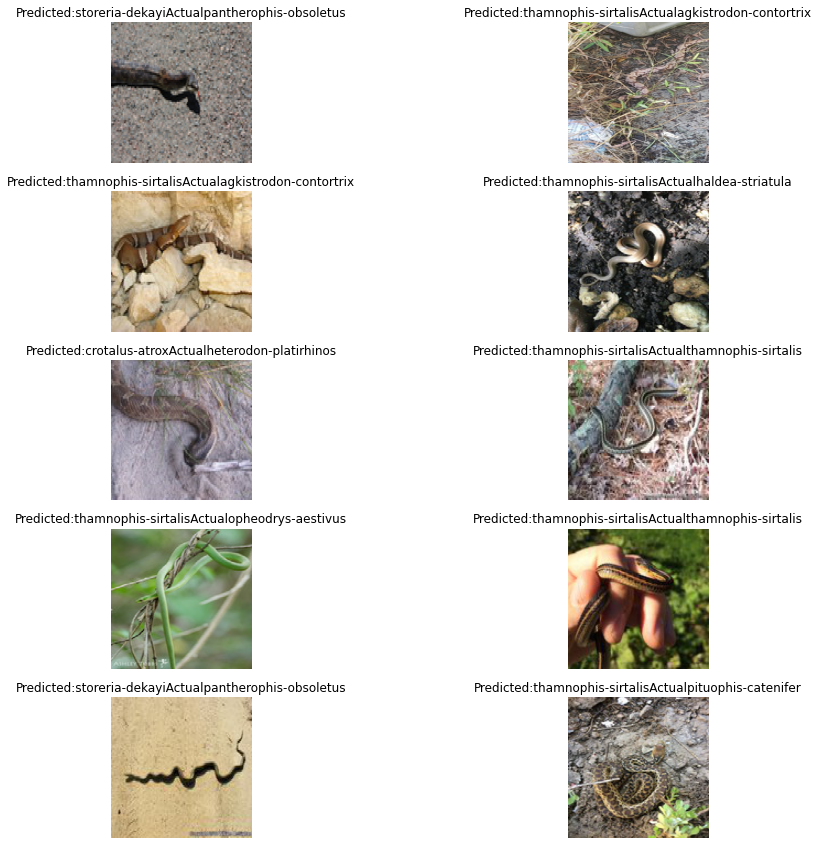

In [57]:
j=1
plt.figure(figsize=(15, 15))
for i in sample.index:
  plt.subplot(5, 2, j)
  img = tf.keras.preprocessing.image.load_img(sample['file'][i], target_size=(256, 256))
  plt.imshow(img)
  plt.axis("off")
  plt.title("Predicted:" + test_df['pred_labels'][i] + "Actual" + test_df['actuals'][i])
  j+=1